In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [8]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.strip(' (cm)') for i in iris.feature_names]
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Scale data

In [9]:
for col in df.columns:
    avg = df[col].mean()
    sd = df[col].std()
    df[col] = df[col].apply(lambda x : (x - avg) / sd)
df.head()

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


## Implement DBSCANE

In [13]:
df.shape, df.shape[1]

((150, 4), 4)

In [14]:
min_samples = df.shape[1]*2
dbscane = DBSCAN(eps=0.5, min_samples=min_samples)
cluster = dbscane.fit_predict(df)
print('cluster created: ' , str(list(set(cluster))))

cluster created:  [0, 1, 2, -1]


## Implement DBSCANE with Elbow method

In [15]:
min_samples

8

In [17]:
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distance, indices = nbrs.kneighbors(df)

In [24]:
distance

array([[0.        , 0.13119268, 0.1333894 , ..., 0.25927024, 0.25927024,
        0.26538653],
       [0.        , 0.16558865, 0.17831235, ..., 0.27029198, 0.28294325,
        0.43255082],
       [0.        , 0.1333894 , 0.16994296, ..., 0.3518639 , 0.36228991,
        0.36669188],
       ...,
       [0.        , 0.31261267, 0.40613758, ..., 0.46177783, 0.46233979,
        0.47547302],
       [0.        , 0.21126079, 0.50158704, ..., 0.71760598, 0.72497405,
        0.90321035],
       [0.        , 0.20848113, 0.2667788 , ..., 0.60514593, 0.608838  ,
        0.63378236]])

In [18]:
print('min samples: ', str(min_samples))
print('shape of distances metrix:' , str(distance.shape) + '\n')
for enum, row in enumerate(distance[:5]):
    print(f'observation {str(enum)} : {str([round(x,2) for x in row])}')

min samples:  8
shape of distances metrix: (150, 8)

observation 0 : [0.0, 0.13, 0.13, 0.19, 0.24, 0.26, 0.26, 0.27]
observation 1 : [0.0, 0.17, 0.18, 0.18, 0.24, 0.27, 0.28, 0.43]
observation 2 : [0.0, 0.13, 0.17, 0.28, 0.31, 0.35, 0.36, 0.37]
observation 3 : [0.0, 0.24, 0.25, 0.27, 0.28, 0.35, 0.35, 0.36]
observation 4 : [0.0, 0.18, 0.26, 0.27, 0.29, 0.34, 0.37, 0.43]


In [20]:
df['knn_farthest_dis'] = distance[:,-1]
df.head()

,sepal length,sepal width,petal length,petal width,knn_farthest_dis
0,-0.897674,1.015602,-1.335752,-1.311052,0.265387
1,-1.139200,-0.131539,-1.335752,-1.311052,0.432551
2,-1.380727,0.327318,-1.392399,-1.311052,0.366692
3,-1.501490,0.097889,-1.279104,-1.311052,0.362290
4,-1.018437,1.245030,-1.335752,-1.311052,0.432551


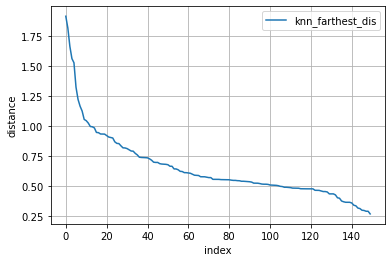

In [21]:
df.sort_values('knn_farthest_dis', ascending=False).reset_index()[['knn_farthest_dis']].plot()
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(True)
plt.show()

In [22]:
km = DBSCAN(eps=0.7, min_samples=min_samples)
df['cluster'] = km.fit_predict(df[['sepal length' , 'sepal width', 'petal length', 'petal width']])
df.cluster.value_counts()

 1    86
 0    47
-1    17
Name: cluster, dtype: int64